In [5]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
import nltk

In [6]:
data=pd.read_csv("tweets.csv")

In [7]:
data.describe()

,sentiment_label
count,160000.000000
mean,2.000000
std,2.000006
min,0.000000
25%,0.000000
50%,2.000000
75%,4.000000
max,4.000000


In [8]:
data.head()

,sentiment_label,tweet_text
0,4,"@elephantbird Hey dear, Happy Friday to You A..."
1,4,Ughhh layin downnnn Waiting for zeina to co...
2,0,"@greeniebach I reckon he'll play, even if he's..."
3,0,@vaLewee I know! Saw it on the news!
4,0,very sad that http://www.fabchannel.com/ has c...


In [9]:
import string
sp=string.punctuation

In [14]:
tweets=data["tweet_text"].tolist()
tweets

["@elephantbird Hey dear, Happy Friday to You  Already had your rice's bowl for lunch ?",
 'Ughhh layin downnnn    Waiting for zeina to cook breakfast',
 "@greeniebach I reckon he'll play, even if he's not 100%...but i know nothing!! ;) It won't be the same without him.",
 '@vaLewee I know!  Saw it on the news!',
 "very sad that http://www.fabchannel.com/ has closed down. One of the few web services that I've used for over 5 years",
 "@Fearnecotton who sings 'I Remember'? i alwaysss hear it on Radio 1 but never catch the artist",
 'With God on ur side anything is possible....',
 '@LoveSmrs why being stupid?',
 'Having delved back into the guts of Expression Engine, its a flexible CMS if you have to use it as a dev, not great for clients though',
 '@emoskank awww   take him with you!',
 'the video on VH1 is much better than the u tube one',
 'i ran out of champagne......  i wonder if i call my brother i could convince him to bring me up a bottle....',
 '@carolinefjones I wish I was goin

In [15]:
tweets=map(lambda t:''.join(["" if c.isdigit() else c for c in t]),tweets)

In [16]:
tweets=map(lambda t:''.join(["" if c in sp else c for c in t]),tweets)

In [17]:
tweets=map(string.lower,tweets)

In [18]:
tweets[:5]

['elephantbird hey dear happy friday to you  already had your rices bowl for lunch ',
 'ughhh layin downnnn    waiting for zeina to cook breakfast',
 'greeniebach i reckon hell play even if hes not but i know nothing  it wont be the same without him',
 'valewee i know  saw it on the news',
 'very sad that httpwwwfabchannelcom has closed down one of the few web services that ive used for over  years']

In [23]:
def to_df(tweets):
    tweets=map(lambda t: nltk.regexp_tokenize(t,r'\S+'),tweets)
    tweets=[w for l in tweets for w in l]
    
    fdist=nltk.FreqDist(tweets)
    frame=pd.DataFrame(fdist.items(),columns=['Word','Count'])
    frame=frame.sort_values('Count',ascending=False)
    return frame.set_index('Word',drop=False)

wf=to_df(tweets)
wf.head(15)

,Word,Count
Word,,
i,i,74982
to,to,56329
the,the,51708
a,a,37949
my,my,31680
and,and,30083
you,you,26978
is,is,23723
it,it,23179


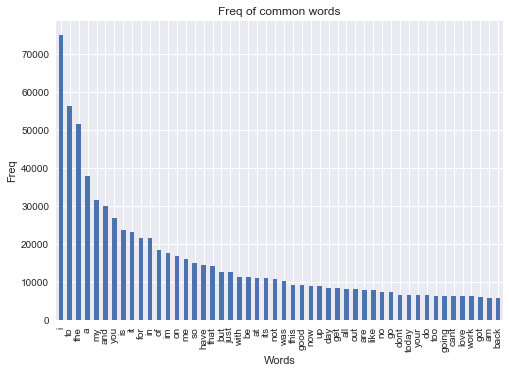

'Done'

In [28]:
def wf_bar(wf):
    
    wf["Count"][:50].plot(kind='bar')
    plt.title("Freq of common words")
    plt.xlabel("Words")
    plt.ylabel("Freq")
    plt.show()
    return 'Done'

wf_bar(wf)

In [29]:
stopwords=pd.read_csv("stopwords.csv")

In [30]:
stopwords=[w for w in stopwords.words if w in stopwords.words.unique()]
stopwords[:20]

['a',
 'about',
 'above',
 'actual',
 'after',
 'again',
 'against',
 'all',
 'alreadi',
 'also',
 'alway',
 'am',
 'amp',
 'an',
 'and',
 'ani',
 'anoth',
 'any',
 'anyth',
 'are']

In [32]:
temp=[tweet.split() for tweet in tweets]
tweets=[''.join([word for word in tweet if not word in set(stopwords)]) for tweet in temp]
tweets[:10]

['elephantbirddearhappyalreadyricesbowl',
 'ughhhlayindownnnnwaitingzeinacookbreakfast',
 'greeniebachreckonhellhesnothingwontwithout',
 'valeweenews',
 'sadhttpwwwfabchannelcomclosedwebservicesiveusedyears',
 'fearnecottonsingsrememberalwaysssradiocatchartist',
 'godursideanythingpossible',
 'lovesmrsstupid',
 'delvedgutsexpressionengineflexiblecmsdevgreatclients',
 'emoskankawww']

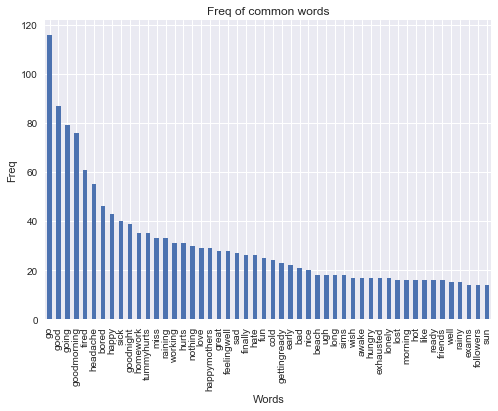

'Done'

In [34]:
wf=to_df(tweets)
wf_bar(wf)

In [37]:
def decode_verbose(bs,index):
    try:
        result=bs.decode('utf-8','strict')
    except UnicodeDecodeError:
            result=bs.decode('utf-8','ignore')
            print "Problematic bytestring at index{2}:{0}|Ignored:{1}".format(bs,result,index)
    return result

from nltk.stem.porter import PorterStemmer
porterstemmer=PorterStemmer()
temp=[decode_verbose(t,i) for i,t in enumerate(tweets)]
temp=[tweet.split() for tweet in temp]
temp=map(lambda t: [porterstemmer.stem(w) for w in t],temp)
tweet=[''.join(tweet) for tweet in temp]
tweet[:10]

[u'elephantbirddearhappyalreadyricesbowl',
 u'ughhhlayindownnnnwaitingzeinacookbreakfast',
 u'greeniebachreckonhellhesnothingwontwithout',
 u'valeweenew',
 u'sadhttpwwwfabchannelcomclosedwebservicesiveusedyear',
 u'fearnecottonsingsrememberalwaysssradiocatchartist',
 u'godursideanythingposs',
 u'lovesmrsstupid',
 u'delvedgutsexpressionengineflexiblecmsdevgreatcli',
 u'emoskankawww']

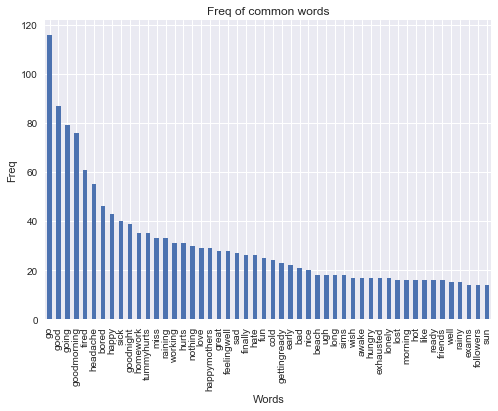

'Done'

In [38]:
wf=to_df(tweets)
wf_bar(wf)